# Исследование и анализ гипотез для увеличение выручки интернет-магазина

Мы - аналитики крупного интернет-магазина. В нашем распоряжении несоколько гипотез, которые возможно помогут нам увеличить выручку нашего интернет-магазина.

**Цель исследования** — Нам нужно проанализировать выдвинутые гипотезы и провести анализ A/B-теста для увеличения выручки нашего интернет-магазина.

**Задачи:**
* Приоритизация гипотез
* Анализ A/B-теста

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc">

<a href='#1. Приоритизация гипотез'>1. Приоритизация гипотез</a>
    
<a href='#1.1 Изучение данных'>1.1 Изучение данных</a>
    
<a href='#1.2 Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета'>1.2 Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета</a>
    
<a href='#1.3 Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета'>1.3 Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета</a>
    
<a href='#1.4 Анализ изменения приоритизации гипотез при применении RICE вместо ICE. Объяснение, почему так произошло'>1.4 Анализ изменения приоритизации гипотез при применении RICE вместо ICE. Объяснение, почему так произошло</a>

<a href='#2. Анализ A/B-теста'>2. Анализ A/B-теста</a>
    
<a href='#2.1 Изучение данных'>2.1 Изучение данных</a>   
    
<a href='#2.2 Предобработка данных'>2.2 Предобработка данных</a> 
    
<a href='#2.3 Построение графика кумулятивной выручки по группам. Выводы и предположения'>2.3 Построение графика кумулятивной выручки по группам. Выводы и предположения</a>
    
<a href='#2.4 Построение графика кумулятивного среднего чека по группам. Выводы и предположения'>2.4 Построение графика кумулятивного среднего чека по группам. Выводы и предположения</a>
    
<a href='#2.5 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения'>2.5 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения</a>
    
<a href='#2.6 Построение графика кумулятивной конверсии по группам. Выводы и предположения'>2.6 Построение графика кумулятивной конверсии по группам. Выводы и предположения</a>
    
<a href='#2.7 Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения'>2.7 Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения</a>
    
<a href='#2.8 Построение точечного графика количества заказов по пользователям. Выводы и предположения'>2.8 Построение точечного графика количества заказов по пользователям. Выводы и предположения</a>
    
<a href='#2.9 Подсчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей'>2.9 Подсчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей</a>
    
<a href='#2.10 Построение точечного графика стоимости заказов. Выводы и предположения'>2.10 Построение точечного графика стоимости заказов. Выводы и предположения</a>
    
<a href='#2.11 Подсчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов'>2.11 Подсчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов</a>
    
<a href='#2.12 Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения'>2.12 Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения</a>
    
<a href='#2.13 Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения'>2.13 Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения</a>
    
<a href='#2.14 Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения'>2.14 Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения</a>
    
<a href='#2.15 Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения'>2.15 Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения</a>
    
<a href='#2.16 Принятие решения по результатам теста и объяснение его'>2.16 Принятие решения по результатам теста и объяснение его</a>

<a id='1. Приоритизация гипотез'></a>
## Приоритизация гипотез

<a id='1.1 Изучение данных'></a>
### Изучение данных

In [1]:
import pandas as pd
import warnings 
warnings.simplefilter('ignore')
from scipy import stats as st
import scipy.stats as stats
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime as dt

In [2]:
data_hypothesis=pd.read_csv('hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth',999) # добавил для вывода наименования гипотез полностью
data_hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


In [4]:
data_hypothesis.sort_values(['Reach','Impact','Confidence','Efforts'], ascending=[False,False,False,False])

,Hypothesis,Reach,Impact,Confidence,Efforts
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
data_hypothesis.columns = data_hypothesis.columns.str.lower() # для "красоты" приведем наименование столбцов к нижнему регистру

<a id='1.2 Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета'></a>
### Применение фреймворка ICE для приоритизации гипотез. Сортировка их по убыванию приоритета

Для расчета ICE воспользуемся формулой:

\begin{equation*}
ICE =
\frac{Impact * Confidence}
{\operatorname{Efforts}}
\end{equation*}

In [6]:
data_hypothesis['ICE']=(data_hypothesis['impact']*data_hypothesis['confidence'])/data_hypothesis['efforts']
data_hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Получили, что гиптеза 8 самая перспективная ( с большим отрывом от остальных), на втором и третьем месте гипотезы 0 и 7 соотвественно. 6 и 2 гипотеза следующие, но с достаточным отставанием.

<a id='1.3 Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета'></a>
### Применение фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета

Для расчета RICE воспользуемся формулой:

\begin{equation*}
RICE =
\frac{Reach * Impact * Confidence}
{\operatorname{Efforts}}
\end{equation*}

In [7]:
data_hypothesis['RICE']=(
                         (data_hypothesis['impact']*data_hypothesis['reach']*data_hypothesis['confidence'])/
                         data_hypothesis['efforts'] 
)
data_hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В лидерах у нас гипотезе под теми же номерами: 0,2,6,7 и 8. Однако, первое место теперь заняла гипотеза 7 с очень большим отрывом. Следом примерно на одном уровне идут гипотезы 2, 0 и 6.

<a id='1.4 Анализ изменения приоритизации гипотез при применении RICE вместо ICE. Объяснение, почему так произошло'></a>
### Анализ изменения приоритизации гипотез при применении RICE вместо ICE. Объяснение, почему так произошло

Посмотрим на результат вместе:

In [8]:
data_hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При применении метода RICE мы увидели, что гипотезы 7 и 2 вырвались вперед, несмотря на то что при использовании метода ICE они не были в лидерах. Так получилось,потому что параметр Reach у данных гипотез самый большой. К тому же гипотеза под номером 7 имеет один самых больших параметров Impact и Confidence, что не могло не вывести ее в лидеры в совокупности с параметром Reach.

<a id='2. Анализ A/B-теста'></a>
## Анализ A/B-теста

<a id='2.1 Изучение данных'></a>
### Изучение данных

In [9]:
orders=pd.read_csv('orders.csv')
orders.sample(5)

,transactionId,visitorId,date,revenue,group
152,3227521980,3938001975,2019-08-01,9980,B
257,225225498,2308309101,2019-08-23,14271,A
858,192721366,1316129916,2019-08-27,93940,A
3,3797467345,1196621759,2019-08-15,9759,B
542,3049238571,2710478747,2019-08-20,10485,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [11]:
visitors=pd.read_csv('visitors.csv')
visitors.sample(5)

,date,group,visitors
1,2019-08-02,A,619
60,2019-08-30,B,490
3,2019-08-04,A,717
38,2019-08-08,B,654
18,2019-08-19,A,502


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a id='2.2 Предобработка данных'></a>
### Предобработка данных

Так как у нас во всех датасетах тип даты "non-null object", то приведем это к нужному нам формату:

In [13]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Проверим наличе явных дубликатов:

In [14]:
print ('Дубликатов в таблице orders:', orders.duplicated().sum())
print ('Дубликатов в таблице visitors:', visitors.duplicated().sum())

Дубликатов в таблице orders: 0
Дубликатов в таблице visitors: 0


In [15]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [16]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Переименуем столбецы в orders:

In [17]:
orders=orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

Проверим, есть ли пользователи, которые попалии в группу А и в группу В:

In [18]:
np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

Их количество:

In [19]:
len(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique()))

58

Общее количество пользователей уникальных пользователей:

In [20]:
len(orders['visitor_id'].unique())

1031

Не совсем мне понятно, как было деление на группы, если одни и теже пользователи попали в разные группы ( считаю что такого быть не должно), удалим повторяющихся пользователей из группы А и группы:

In [21]:
orders=orders[~orders['visitor_id'].isin(np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), 
                                    orders.query('group == "B"')['visitor_id'].unique()))]
np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())

array([], dtype=int64)

В предобработке данных мы сделали:
1. Привели написание столбцов к нужному регистру.
2. Привели столбец с датой к нужному типу данных.
3. Удалили повторяющихся пользователей в группе А и группе В.
4. Проверили, что отсутствуют явные дубликаты.
5. Пропуски отсутсвуют.

В целом данные достаточно хорошие и подходят для работы в дальнейшем.

<a id='2.3 Построение графика кумулятивной выручки по группам. Выводы и предположения'></a>
### Построение графика кумулятивной выручки по группам. Выводы и предположения

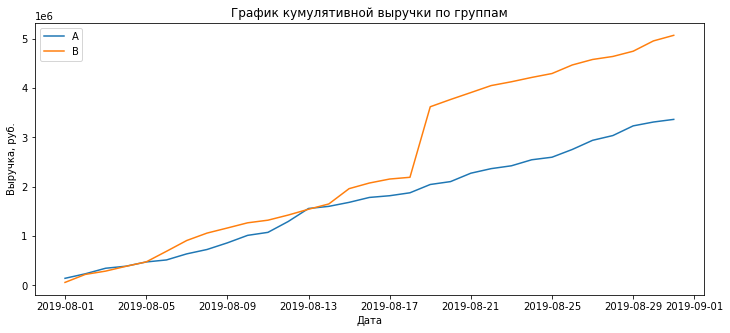

In [22]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12,5))
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.legend()
plt.show()

Судя по графику кумулятивной выручки практически с самого начала выручка по группе В лидирует над выручкой по группе А, ближе к середине теста группа А практически переломила ход событий, но не смогла удержать лидируещую позицию. К концу теста группа В значительно вырвалась вперед. 

Значительные колебания просиходят в течение всего теста, скорее всего в выборке есть аномальные заказы, которые "портят" нам картину в целом. В дальнейшем мы с этими аномальными заказами "разберемся"

<a id='2.4 Построение графика кумулятивного среднего чека по группам. Выводы и предположения'></a>
### Построение графика кумулятивного среднего чека по группам. Выводы и предположения

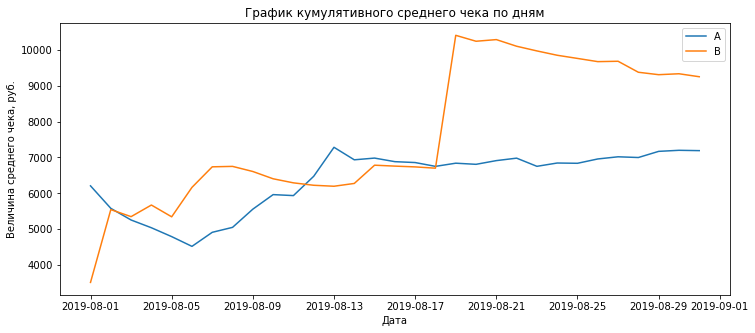

In [23]:
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Величина среднего чека, руб.')
plt.title('График кумулятивного среднего чека по дням')
plt.legend() 
plt.show()

Среднее значение кумулятивного среднего чека так же сильно колеблется на протяжении всего периода, лидируещую позицию так же занимает группа В. Скорее всего здесь так же не обошлось без аномально дорогих заказов, которые дают нам неправильную картину.

<a id='2.5 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения'></a>
### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. Выводы и предположения

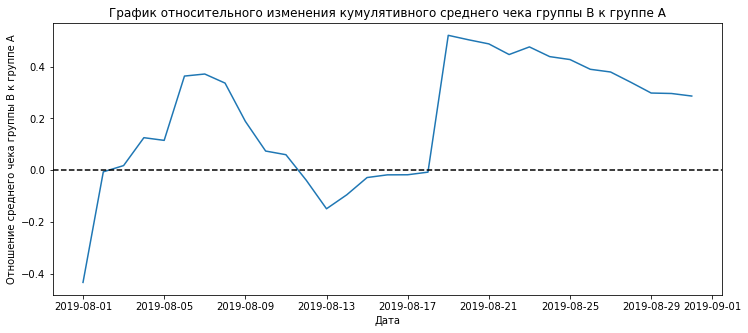

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к группе А')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

К концу теста средник чек группы в значительно больше среднего чека группы А. Но стоит заметить, что в период проведения теста есть несколько переломных моментов, в которые происходили резкие колебания. Предполагаю, что опять во всем виноваты аномально дорогие заказы, которые в очередной раз нам "мешают".

<a id='2.6 Построение графика кумулятивной конверсии по группам. Выводы и предположения'></a>
### Построение графика кумулятивной конверсии по группам. Выводы и предположения

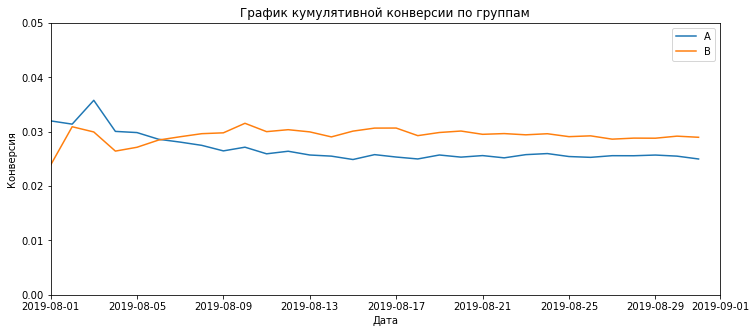

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12,5))
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.show()

Судя по графику, конверсия группы В вначале теста была ниже конверсии группы А, но достаточно быстро группа В заняла лидируещую позицую и уверенно обогнала группу А. Однако стоить заметить, что в концу исследуемого периода конверсия по группам немного пошла на убыль, но билже к концу периода все "устаканилось".

<a id='2.7 Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения'></a>
### Построение графика относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения

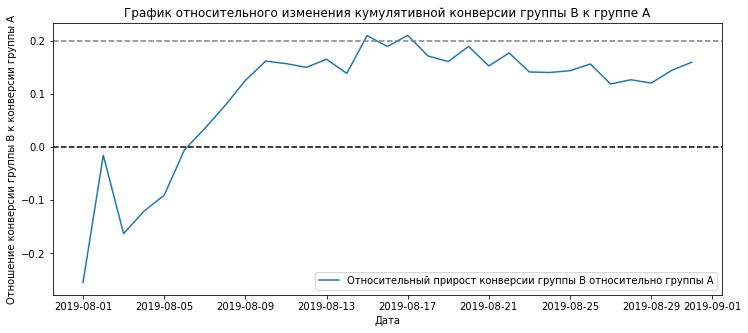

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,5))

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение конверсии группы В к конверсии группы А')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()

Практически с самого начала конверсия группы В лучше в конверсии группы А ( заметны некоторые колебания в периоде исследования), но в целом конверсия группы В всегда выше. К концу исследуемого периода конверсия группы В зафиксировалась около прироста в 18 % относительно группы А.

<a id='2.8 Построение точечного графика количества заказов по пользователям. Выводы и предположения'></a>
### Построение точечного графика количества заказов по пользователям. Выводы и предположения

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


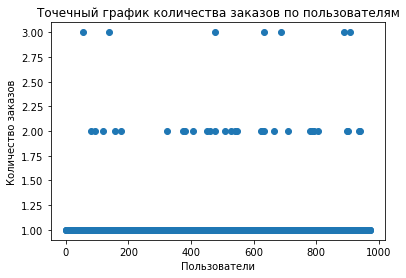

In [27]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0, len(ordersByUsers)))
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

В нашем случае получается, что большинство пользователей совершили 1 заказ, но у нас по графику видно, что есть пользователи, которые совершили 2 и 3 заказа. Далее выясним, 2 и 3 заказа - это много или мало и что нам с этим делать.

<a id='2.9 Подсчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей'></a>
### Подсчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [28]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


Получается, что не больше 1 % прользователей совершили более 1 заказов.

<a id='2.10 Построение точечного графика стоимости заказов. Выводы и предположения'></a>
### Построение точечного графика стоимости заказов. Выводы и предположения

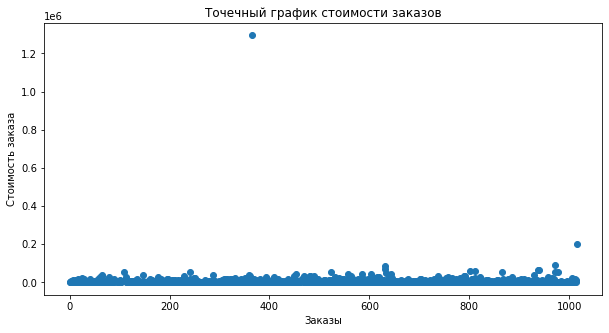

In [29]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.title('Точечный график стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue']) 
plt.show()

Судя по графику большинство заказов ограничиваются суммой в 20-40 тыс. руб. Однако, есть и выбивающиеся значения: около 200 тыс. руб. и более 1 200 тыс. руб. Два аномально высоких заказа, которые портят всю картину.

<a id='2.11 Подсчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов'></a>
### Подсчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более чем у 5% пользователей заказы превышают 26 785 руб., и лишь 1 % пользователей превысили заказ в стоимости 53 904 руб.

<a id='2.12 Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения'></a>
### Расчет статистической значимости различий в конверсии между группами по «сырым» данным. Выводы и предположения

Объявим p-value = 0,05

Нулевая гипотеза: статистически значимых различий между конверсиями групп нет

Альтернативная гипотеза: статитически значимые различия между конверсиями есть

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print( 'Значение p-value:',"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы В к конверсии группы А:',"{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

p-value ниже 0,05 - значит нулевую гипотезу отвергаем. Судя по сырым данным, в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А составляет 16 %.

<a id='2.13 Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения'></a>
### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения

Объявим p-value = 0,05

Нулевая гипотеза: статистически значимых различий между средними чеками групп нет

Альтернативная гипотеза: статитически значимые различия между средними чеками групп есть

In [32]:
print( 'Значение p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print( 'Относительное изменение среднего чека группы B к группе А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value: 0.829
Относительное изменение среднего чека группы B к группе А: 0.287


p-value выше 0,05, а это значит что значимых статистических различий в группах по среднему чеку нет. А вот относительное различие среднего чека между сегмантами АЖ 28,7 % ( как то много, посмотрим что будет по очищенным данным).

Мы уже выяснили, что у нас есть аномалии ( выбросы), давйте этот факт еще проверим критерием Шапиро-Уилка:

In [33]:
alpha = 0.05 
results = st.shapiro(orders['revenue'])
p_value = results[
    1
]  
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


<a id='2.14 Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения'></a>
### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. Выводы и предположения

95-й и 99-й перцентили средних чеков равны 26 785 и 53 904 рублям.

99-й перцентили числа заказов на одного пользователя равен 2 и более заказам.

Предлагаю исключить из выборки всех пользователей, которые совершили более 1 заказа и на сумму более 26 785 руб. Если с заказами более 1 все более менее понятно ( 99 % пользователей совершили 1 заказ, тогда как 1 % пользователей совершили более 1 заказал и это аномалия в чистом виде), то как определить сумму заказа, которую необходимо отсечь. Насколько я понял, нам сейчас не дали информацию что за интернет-магазин мы анализируем и какие товары он продает. На мой взгляд это бы очень помогло нам ( зная что магазин продает мы бы более точно определили средний чек и скорректировали с учетом сегмента). Предлагаю отбросить заказы со стоимостью выше 35 000 руб.

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 35000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Объявим p-value = 0,05

Нулевая гипотеза( для очищенных данных): статистически значимых различий между конверсиями групп нет

Альтернативная гипотеза( для очищенных данных): статитически значимые различия между конверсиями есть

In [35]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('Значение p-value:','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы В к конверсии группы А:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Значение p-value: 0.00907
Относительный прирост конверсии группы В к конверсии группы А: 0.187


p-value ниже 0,05 - значит нулевую гипотезу отвергаем. Судя по очищенным данным, в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А составляет уже 18 %. Сегмент В лучше сегманта А.

<a id='2.15 Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения'></a>
### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения

Объявим p-value = 0,05

Нулевая гипотеза: статистически значимых различий между средними чеками групп нет

Альтернативная гипотеза: статитически значимые различия между средними чеками групп есть

In [36]:
print( 'Значение p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print( 'Относительное изменение среднего чека группы B к группе А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Значение p-value: 0.964
Относительное изменение среднего чека группы B к группе А: 0.021


p-value выше 0,05, а это значит что значимых статистических различий в группах по среднему чеку нет. Относительное различие среднего чека между сегментами теперь 2,1 % (теперь это похоже на правду, аномально дорогие заказы внесли свою лепту в "сырые данные").

<a id='2.16 Принятие решения по результатам теста и объяснение его'></a>
### Принятие решения по результатам теста и объяснение его

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
2. По сырым данным нет статистически значимого различия по среднему чеку между группами, как и по очищенным данным. Однако по очищенным данным ( из-за отсутствия аномалий), относительное различие среднего чека между сегмантами сократилось с 27 % до 2 %.
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A.
4. График различия среднего чека из-за резких колебаний помог нам найти аномалии.

Вывод: предлагаю остановить тест и признать его успешным, мы выяснили и подтвердили, что конверсия в группе В лучше и средний чек выше ( несмотря на то что статистически значимых отличий по среднему чеку нет).